In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('data Mashable.csv') 
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


Tail on the right. It is not a balanced distribution but a left positive skew. 
I deleted everything below 35kg there are still some outliers on the right side which are more heavy people.

In [10]:
subset = df[["num_videos", "n_tokens_content", "average_token_length", "title_subjectivity", "global_sentiment_polarity"]]
subset.head(5)

,num_videos,n_tokens_content,average_token_length,title_subjectivity,global_sentiment_polarity
0,0,821,4.518879,0.666667,0.082486
1,0,489,5.040900,0.000000,0.027715
2,1,131,4.877863,0.000000,0.259120
3,0,556,4.974820,0.000000,0.134424
4,0,880,4.928409,0.000000,0.109256


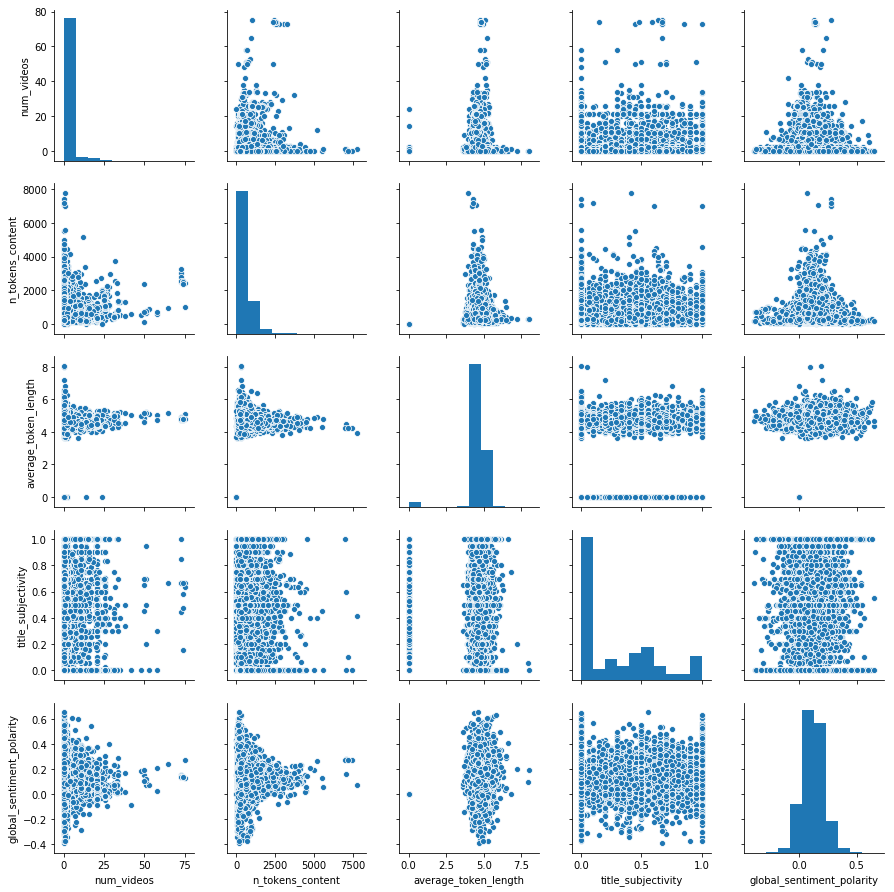

In [15]:
sns.pairplot(subset)

In [21]:
from sklearn.linear_model import LinearRegression #the model
from sklearn.model_selection import train_test_split #the function to split the data

X = subset[["num_videos", "n_tokens_content", "average_token_length", "title_subjectivity", "global_sentiment_polarity"]] 
y = df["shares_log"] 

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.3)
lm = LinearRegression();
lm.fit(X_train_l, y_train_l); 
X_train_l.head()

,num_videos,n_tokens_content,average_token_length,title_subjectivity,global_sentiment_polarity
15582,1,613,4.872757,0.2875,-0.015891
18679,1,493,4.442191,0.0000,0.097842
19096,22,864,4.837963,0.0000,0.066001
2226,1,174,4.057471,0.0000,0.241074
280,1,1702,4.454172,0.0000,0.054652


In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
lm.coef_

array([ 3.21707570e-03,  2.95324074e-05, -2.37285711e-02,  6.31202657e-02,
        2.47442357e-01])

In [42]:
df['shared_pred']= lm.predict(X)

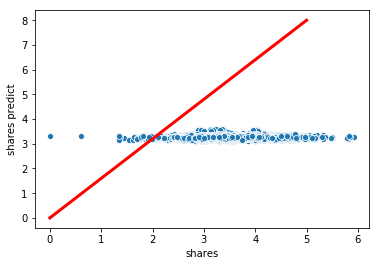

In [47]:
sns.scatterplot(x='shares_log',y="shared_pred", data=df)
plt.xlabel('shares')
plt.ylabel('shares predict')

plt.plot([0, 5], [0, 8], color='red', lw=3)
plt.show()

In [49]:
math.sqrt(mean_squared_error(df['shares_log'],df['shared_pred']))

0.40610663434587363

RMSE shows predicted shares are off with 0.40

In [50]:
r2_score(df['shares_log'], df['shared_pred'])

0.009551058483865504

9.5% of the of the predicted shares is explained in the model

Linear regression is the relation between the slope: particular variable for X axis and the intercept: where the line meets the Y axis. Linear regression formula:  y = b0 + b1X+e